# Predictive Maintenance with Python

Basic predictive maintenance workflow.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [146]:
data = pd.read_csv('Datasets/sensor_data.csv')
data

,timestamp,temperature,vibration,pressure,failure
0,2023-06-01 00:00:00,24.778311,0.064223,15.053874,0.0
1,2023-06-01 00:01:00,26.096909,0.025371,14.620546,0.0
2,2023-06-01 00:02:00,25.207367,0.037460,14.799920,0.0
3,2023-06-01 00:03:00,23.288264,0.079422,15.955697,0.0
4,2023-06-01 00:04:00,21.738583,0.073841,15.205834,0.0
...,...,...,...,...,...
9995,2023-06-07 22:35:00,25.434427,0.105087,15.535210,0.0
9996,2023-06-07 22:36:00,28.019612,0.060835,14.883057,0.0
9997,2023-06-07 22:37:00,22.626309,0.071021,16.168942,0.0
9998,2023-06-07 22:38:00,27.417844,0.026161,15.375560,0.0


In [147]:
data = data.dropna()
data['timestamp'] = pd.to_datetime(data['timestamp']).astype('int64') / 10**9
data


,timestamp,temperature,vibration,pressure,failure
0,1.685578e+09,24.778311,0.064223,15.053874,0.0
1,1.685578e+09,26.096909,0.025371,14.620546,0.0
2,1.685578e+09,25.207367,0.037460,14.799920,0.0
3,1.685578e+09,23.288264,0.079422,15.955697,0.0
4,1.685578e+09,21.738583,0.073841,15.205834,0.0
...,...,...,...,...,...
9995,1.686177e+09,25.434427,0.105087,15.535210,0.0
9996,1.686177e+09,28.019612,0.060835,14.883057,0.0
9997,1.686177e+09,22.626309,0.071021,16.168942,0.0
9998,1.686177e+09,27.417844,0.026161,15.375560,0.0


In [148]:
X = data.drop('failure', axis=1)
y = data['failure']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [150]:
data

,timestamp,temperature,vibration,pressure,failure
0,1.685578e+09,24.778311,0.064223,15.053874,0.0
1,1.685578e+09,26.096909,0.025371,14.620546,0.0
2,1.685578e+09,25.207367,0.037460,14.799920,0.0
3,1.685578e+09,23.288264,0.079422,15.955697,0.0
4,1.685578e+09,21.738583,0.073841,15.205834,0.0
...,...,...,...,...,...
9995,1.686177e+09,25.434427,0.105087,15.535210,0.0
9996,1.686177e+09,28.019612,0.060835,14.883057,0.0
9997,1.686177e+09,22.626309,0.071021,16.168942,0.0
9998,1.686177e+09,27.417844,0.026161,15.375560,0.0


In [151]:
data.describe()

,timestamp,temperature,vibration,pressure,failure
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.685878e+09,25.000090,0.050177,15.002725,0.09500
std,1.732137e+05,2.012173,0.020004,0.708767,0.29323
min,1.685578e+09,16.666295,-0.027331,11.961129,0.00000
25%,1.685728e+09,23.665560,0.036543,14.526104,0.00000
50%,1.685878e+09,25.027594,0.049943,15.005954,0.00000
75%,1.686028e+09,26.343922,0.063554,15.482917,0.00000
max,1.686178e+09,32.685028,0.131886,17.576458,1.00000


In [152]:
rf = RandomForestClassifier(n_estimators=100, random_state=40)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [153]:
# Make predictions
y_pred = rf.predict(X_test)

In [154]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [156]:
accuracy

0.8955

In [157]:
print(report)

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94      1791
         1.0       0.00      0.00      0.00       209

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.80      0.90      0.85      2000



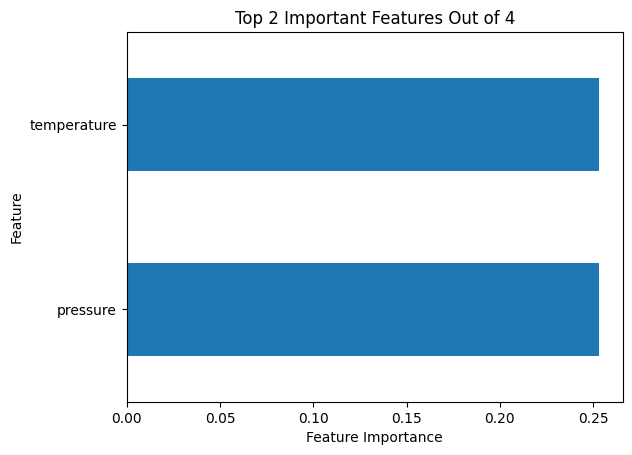

In [158]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(2).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 2 Important Features Out of 4')
plt.show()